In [575]:
from data_loader import load_latest_iteration, find_latest_vtu_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [576]:
mode = "soft"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

Latest iteration 0 is not the same as the global latest iteration 979


In [577]:
data.keys()

dict_keys(['domain', 'constraints', 'particles', 'simulation', 'parameters'])

In [578]:
particles = data["particles"]
parameters = data["parameters"]

In [579]:
params = data["parameters"]
params

,dt_s,end_time,log_frequency_seconds,min_box_size_x,min_box_size_y,min_box_size_z,xi,TAU,l0,LAMBDA,...,max_bbpgd_iterations,max_recursive_iterations,linked_cell_size,growth_factor,particle_preallocation_factor,mode,x,y,z,rank
0,0.0002,100.0,0.012,2.0,2.0,0.0,1.0,1.0,1.0,0.01,...,100000,50,2.2,1.5,12.0,1,NaN,NaN,NaN,0


In [580]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,12603.000000,12603.000000,12603.0,12603.0,12603.000000,12603.000000,12603.000000,12603.0,12603.000000,12603.0,...,12603.000000,12603.000000,12603.0,12603.0,12603.0,12603.000000,12603.000000,12603.000000,12603.000000,12603.0
mean,6585.805522,0.016910,0.0,0.0,-0.004014,0.008663,0.005399,0.0,1.354207,0.5,...,-0.053097,0.018783,0.0,0.0,0.0,1.326457,7.263826,-1.134583,0.122311,0.0
std,4030.709058,0.709990,0.0,0.0,0.704054,0.721079,0.692835,0.0,0.275704,0.0,...,8.831122,7.739669,0.0,0.0,0.0,234.834996,3.459056,16.732684,15.872185,0.0
min,0.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,1.000110,0.5,...,-176.535000,-103.585000,0.0,0.0,0.0,-1223.150000,0.000000,-36.843400,-35.712600,0.0
25%,3150.500000,-0.691933,0.0,0.0,-0.704929,-0.734120,-0.669191,0.0,1.121995,0.5,...,-3.369275,-3.262010,0.0,0.0,0.0,-123.303000,5.000000,-13.768600,-11.845700,0.0
50%,6301.000000,0.031286,0.0,0.0,-0.002030,0.018989,0.011599,0.0,1.284670,0.5,...,-0.147068,-0.017097,0.0,0.0,0.0,-0.533504,7.000000,-2.046200,0.164604,0.0
75%,9451.500000,0.736526,0.0,0.0,0.695846,0.745909,0.673550,0.0,1.547385,0.5,...,3.181100,3.311000,0.0,0.0,0.0,124.930500,9.000000,9.019040,12.219650,0.0
max,13813.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,2.000000,0.5,...,168.477000,116.119000,0.0,0.0,0.0,1315.390000,15.000000,36.858700,35.841400,0.0


In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress

In [582]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles, plot=False)

[19-08-2025 13:03:04] [findpeaks.interpolate] [INFO] Interpolating 1d-vector by factor 2


[np.float64(16.94117647058824), np.float64(7.5), np.float64(15.0)]


[19-08-2025 13:03:04] [findpeaks.interpolate] [INFO] Interpolating 1d-vector by factor 2


[np.float64(16.94117647058824), np.float64(7.5), np.float64(15.0)]


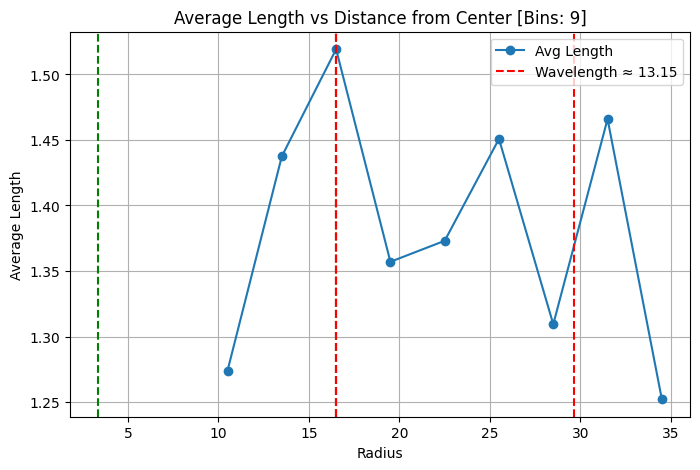

In [583]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(
    f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

# place vertical lines at multiples of wavelength
first_peak = bin_centers[np.argmax(avg_length)]
max_radius = bin_centers.max()

for direction, color in [(+1, "r"), (-1, "g")]:
    current = first_peak
    while 0 < current < max_radius:
        plt.axvline(current, color=color, linestyle="--")
        current += direction * wavelength_fft

# add one legend entry for wavelength
plt.axvline(first_peak, color="r", linestyle="--",
            label=f"Wavelength ≈ {wavelength_fft:.2f}")

plt.legend()

plt.savefig(f"wavelength_{mode}.png")
plt.show()

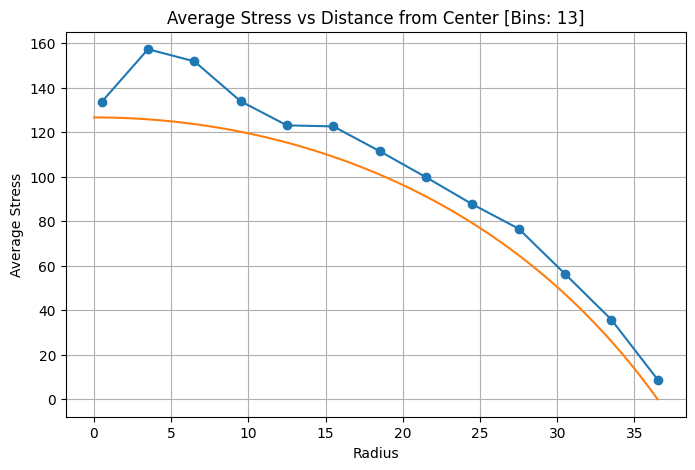

In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress


def pressure_theoretical(r, R, LAMBDA):
    c = (np.sqrt((1 + LAMBDA * R**2 / 2)) - 1) / (2 * LAMBDA * R**2)

    return 2 / LAMBDA * np.log(1/(8*c) - c * LAMBDA * r**2)


bin_centers, avg_impedance = stress.stress_distribution(particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_impedance, "o-", label="Avg Stress")

r = np.linspace(0, bin_centers[-1], 100)

plt.plot(r, pressure_theoretical(r, bin_centers[-1], data["parameters"]["LAMBDA"][0]),
         label="Theoretical")

plt.xlabel("Radius")
plt.ylabel("Average Stress")
plt.title(
    f"Average Stress vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)
plt.savefig(f"stress_{mode}.png")